In [2]:
import numpy as np

import matplotlib.pyplot as plt

np.random.seed(10)

100


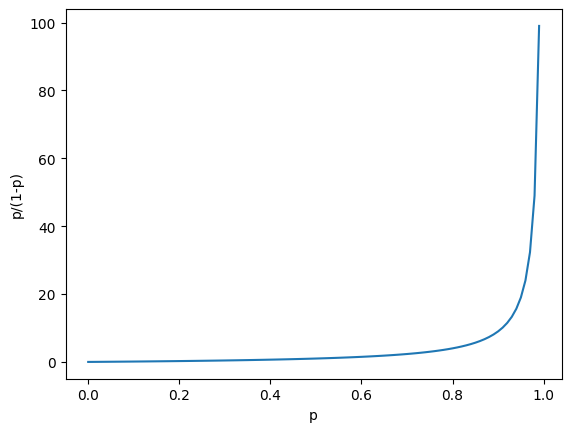

In [3]:
#오즈비

# odds ratio

# 성공확률과 실패 확률의 비율을 나타내는 값

# p / (1-p)  p=성공확률

# p가 0에서 1까지 증가할 때 오즈비는 처음에 천천히 증가하지만 p가 1에 가까워지면 급격히 증가함

probs = np.arange(0, 1, 0.01) # 0~1, 0.01 간격의 리스트

print(len(probs))

odds = [p/(1-p) for p in probs] 

plt.plot(probs, odds)

plt.xlabel('p')

plt.ylabel('p/(1-p)')

plt.show()

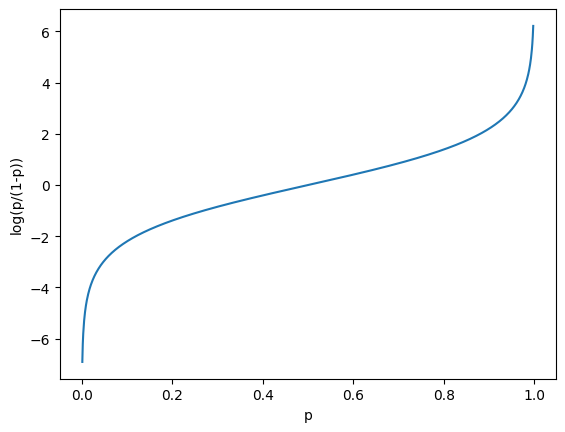

In [4]:
#logit 함수

#오즈 비에 로그 함수를 취하여 만든 함수

# log( p / (1-p) ) = z

# p가 0.5일 때 0이 되고 p가 0과 1일 때 각각 무한대로 음수와 양수가 되는 특징

probs  = np.arange(0.001, 0.999, 0.001)

logit = [np.log(p/(1-p)) for p in probs]

plt.plot(probs, logit)

plt.xlabel('p')

plt.ylabel('log(p/(1-p))')

plt.show()

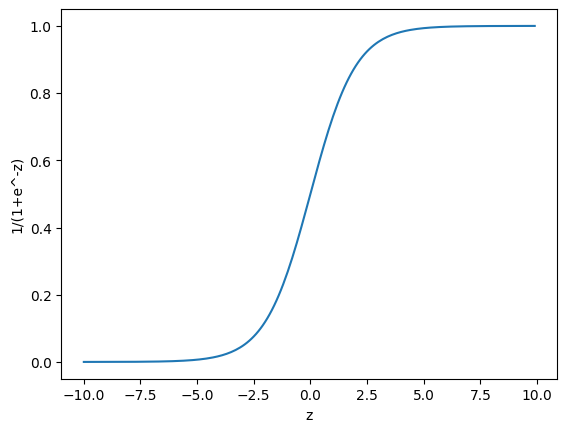

In [5]:
# log( p / (1-p) ) = z

# 위의 식을 z에 대해 정리한 식(로지스틱 함수, sigmoid 함수라고도 함)

# logit 함수의 x,y축이 바뀐 모양

# p = 1/(1+e^-z)

zs = np.arange(-10., 10., 0.1)

gs = [1/(1+np.exp(-z)) for z in zs]

plt.plot(zs, gs)

plt.xlabel('z')

plt.ylabel('1/(1+e^-z)')

plt.show()

(26, 2)


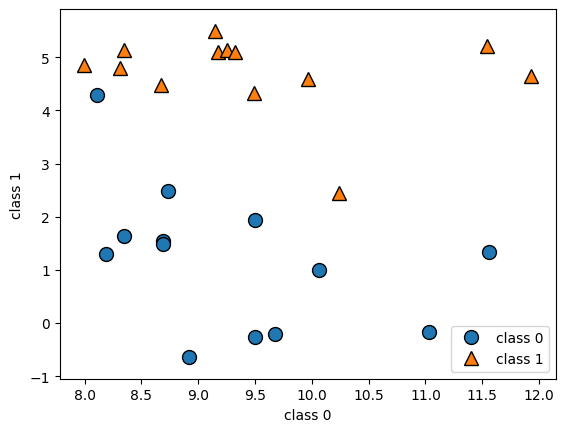

In [7]:
from matplotlib import pyplot as plt

import mglearn

#plt.rcParams['figure.dpi'] = 300

# forge 데이터셋 생성

X, y = mglearn.datasets.make_forge()

# 산점도 그리기

mglearn.discrete_scatter(X[:, 0], X[:, 1], y) #산점도

plt.legend(["class 0", "class 1"], loc=4) #범례

plt.xlabel("class 0") #x축 레이블

plt.ylabel("class 1") #y축 레이블

#데이터포인트 26개와 특성 2개

print(X.shape)

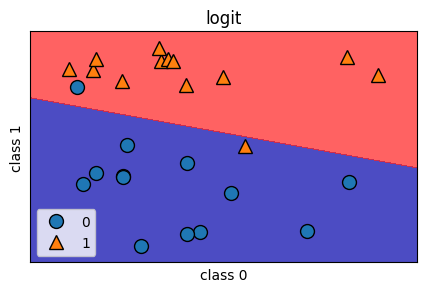

In [8]:
#분류용 선형 모델(로지스틱 회귀)

#로지스틱 회귀분석은 회귀분석이 아니라 분류 알고리즘에 해당됨

from sklearn.linear_model import LogisticRegression

fig, axes = plt.subplots(1,1, figsize=(5, 3)) #1개,1번,가로세로인치

model=LogisticRegression()

#모델을 학습시킴

model = model.fit(X, y)

mglearn.plots.plot_2d_separator(model, X, fill=True, eps=0.5, ax=axes, alpha=.7)

#산점도 그리기

mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes)

axes.set_title("logit")

axes.set_xlabel("class 0")

axes.set_ylabel("class 1")

axes.legend()

#결정경계가 직선으로 표현되었고

#위쪽 클래스1

#아래쪽 클래스 0

#새로운 데이터가 직선 위에 놓이면 클래스1

#반대로 직선 아래쪽에 놓이면 클래스 0

#포인트 2개가 잘못 분류됨

In [9]:
model.score(X,y)

0.9230769230769231

In [10]:
from sklearn.metrics import confusion_matrix

pred=model.predict(X) #새로운 값 예측

confusion_matrix(y,pred)

array([[12,  1],
       [ 1, 12]], dtype=int64)

In [11]:
import numpy as np

# 1원을 1년 저축 100% 이자 => 원금 1원 , 이자 1원 => 2원

# 복리라면 1원을 6개월씩 나누어 저축, 1+0.5, 1원에 대한 이자 0.5, 0.5에 대한 이자 0.25

#  => 2.25

# 365일 투자하고 계속 나누어서 투자한다면 1년에 최대 2.71828... 을 얻을 수 있다

print(np.e) #오일러 상수

print(np.exp(1)) #y=e의 1승

print(np.exp(2)) #y=e의 2승

2.718281828459045
2.718281828459045
7.38905609893065


(-0.1, 1.1)

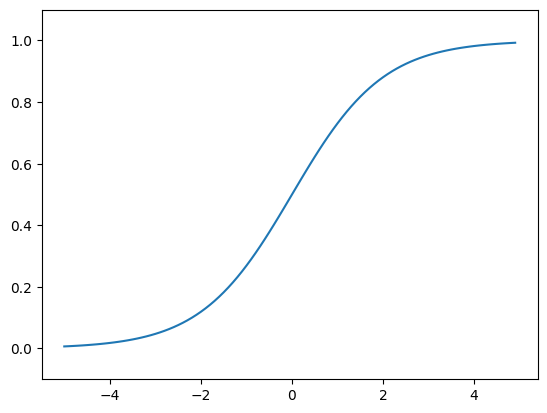

In [12]:
#로지스틱 함수는 시그모이드 함수의 일종 : S자 모양의 함수

# 0.0~1.0 사이의 실수값

import matplotlib.pyplot as plt

def sigmoid(x):

    return 1 / (1 + np.exp(-x))    

X = np.arange(-5.0, 5.0, 0.1)

y = sigmoid(X)

plt.plot(X, y)

plt.ylim(-0.1, 1.1)

In [13]:
# n_samples : 표본 데이터의 수, 디폴트 100

# n_features : 독립 변수의 수, 디폴트 20

# n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2

# n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2

# n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2

# random_state : 난수 발생 시드

from sklearn.datasets import make_classification
import statsmodels.api as sm

X, y = make_classification(n_features=1, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=4)

logit_mod = sm.Logit(y, X)

logit_res = logit_mod.fit()

logit_res.summary()

Optimization terminated successfully.
         Current function value: 0.162261
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       99
Method:                           MLE   Df Model:                            0
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                  0.7658
Time:                        09:35:19   Log-Likelihood:                -16.226
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.1866      0.884      4.738      0.000       2.455       5.919
==============================================================================
"""

In [14]:
#예측값은 0.0~1.0 사이의 실수값

result=logit_res.predict(X)[:5]

print(result)

# 0.5 이상이면 1, 미만이면 0으로 분류함

for a in result:

    print(int(round(a)),end=' ')

[0.08580852 0.99949403 0.00370571 0.99933961 0.30472943]
0 1 0 1 0 

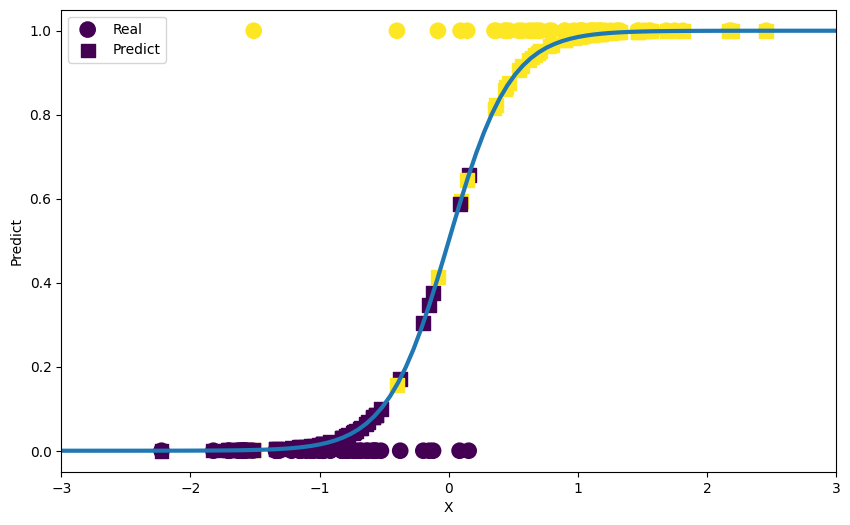

In [15]:
xx = np.linspace(-3, 3, 100)

pred = logit_res.predict(xx) #모형이 예측한 값

plt.figure(figsize=(10,6))

plt.plot(xx, pred, lw=3) #lw: line width

plt.scatter(X, y, c=y, s=100, lw=2, label='Real')

plt.scatter(X, logit_res.predict(X), label='Predict', marker='s', c=y, s=100, lw=1)

plt.xlim(-3, 3)

plt.xlabel('X')

plt.ylabel('Predict')

plt.legend()

In [16]:
#로지스틱 회귀 모형의 성능 측정

#log_loss() 로그 손실값(분류 모형의 성능을 평가할 때 사용하는 값)

#  100%의 확률로 답을 구한 경우 -log(1.0)=0

#  80% 확률 -log(0.8)=0.22314

#  60% 확률 -log(0.6)=0.51082
#  확률이 낮아질수록 log loss는 크게 증가한다.(확률이 낮을 때 더 많은 패널티를 부여)

from sklearn.metrics import log_loss

y_hat = logit_res.predict(X)

# normalize 정규화 여부

log_loss(y, y_hat, normalize=False)

#실제 y값의 평균

mu_null = np.sum(y) / len(y)

mu_null

0.51

In [17]:
#y 리스트와 같은 사이즈로 값을 1로 초기화한 리스트

np.ones_like(y)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
#실제 y값의 평균으로 계산한 로그 손실값

y_null = np.ones_like(y) * mu_null

print(y_null)

log_loss(y, y_null, normalize=False)

[0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51]


69.29471672244784

In [19]:
#결정계수값(Pseudo R-squ.)

1 - (log_loss(y, y_hat) / log_loss(y, y_null))

0.7658389667520492

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [21]:
#사이킷런 패키지의 LogisticRegression() 함수

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)

model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [22]:
print(model.classes_) #출력값

print(model.intercept_) #절편

print(model.coef_) #회귀계수

[0 1]
[0.01226919]
[[2.99964051]]


In [23]:
# 0일 확률, 1일 확률

model.predict_proba(X_test)

array([[0.00935163, 0.99064837],
       [0.0042809 , 0.9957191 ],
       [0.98203716, 0.01796284],
       [0.11772478, 0.88227522],
       [0.10563432, 0.89436568],
       [0.94860925, 0.05139075],
       [0.98920566, 0.01079434],
       [0.13377831, 0.86622169],
       [0.00138021, 0.99861979],
       [0.84328393, 0.15671607],
       [0.89965806, 0.10034194],
       [0.9479758 , 0.0520242 ],
       [0.91097008, 0.08902992],
       [0.254637  , 0.745363  ],
       [0.04540656, 0.95459344],
       [0.96421211, 0.03578789],
       [0.99385135, 0.00614865],
       [0.88330516, 0.11669484],
       [0.85160053, 0.14839947],
       [0.03287466, 0.96712534]])

In [24]:
model.predict(X_test)

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [25]:
model.score(X_test, y_test)

0.95

In [26]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, model.predict(X_test))

array([[10,  0],
       [ 1,  9]], dtype=int64)

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test)))

# precision(정확도, 정밀도) : 모델이 True라고 분류한 것 중에서 실제 True의 비율

# recall(재현율, 검출율) : 실제값이 True인 것 중에서 모델이 True라고 예측한 것의 비율  

# f1-score : precision과 recall의 조화평균(불균형 데이터셋에 많이 사용하는 평가 지표)

# support : 실제값의 개수(0이 1개, 1이 3개)

# accuracy : 정확도

# macro avg : 단순평균(모든 클래스를 동일한 비중으로 고려)

# weighted avg : 각 클래스에 속하는 표본의 개수로 가중평균(f1-score와 같은 값)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



In [2]:
#타이타닉호 생존자 분석
import pandas as pd

df = pd.read_csv("c:/data/titanic/train3.csv")

df.head()

,Survived,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
0,0,0,0,1,1,0,22.0,1,0,7.2500
1,1,1,0,0,0,1,38.0,1,0,71.2833
2,1,0,0,1,0,1,26.0,0,0,7.9250
3,1,1,0,0,0,1,35.0,1,0,53.1000
4,0,0,0,1,1,0,35.0,0,0,8.0500


In [3]:
#생존여부를 기준으로 한 평균값들

df.groupby("Survived").mean()

,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
Survived,,,,,,,,,
0,0.145719,0.176685,0.677596,0.852459,0.147541,30.483607,0.553734,0.329690,22.117887
1,0.397661,0.254386,0.347953,0.318713,0.681287,28.595526,0.473684,0.464912,48.395408


NameError: name 'plt' is not defined

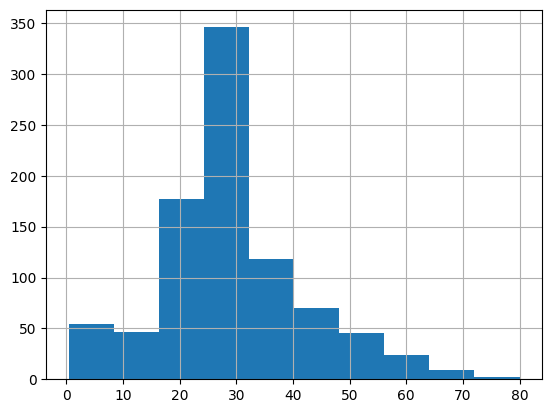

In [4]:
%matplotlib inline

df["Age"].hist()

plt.xlabel('나이')

plt.ylabel('빈도')

NameError: name 'plt' is not defined

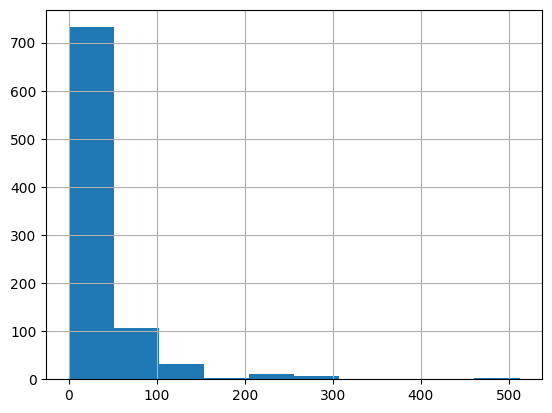

In [5]:
%matplotlib inline

df["Fare"].hist()

plt.xlabel('요금')

plt.ylabel('빈도')

C:\Users\user\AppData\Local\Temp\ipykernel_11032\4153478278.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette=colors)


Text(0.5, 1.0, '분류\n (0: 사망, 1: 생존)')

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 47581 (\N{HANGUL SYLLABLE MANG}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python312\s

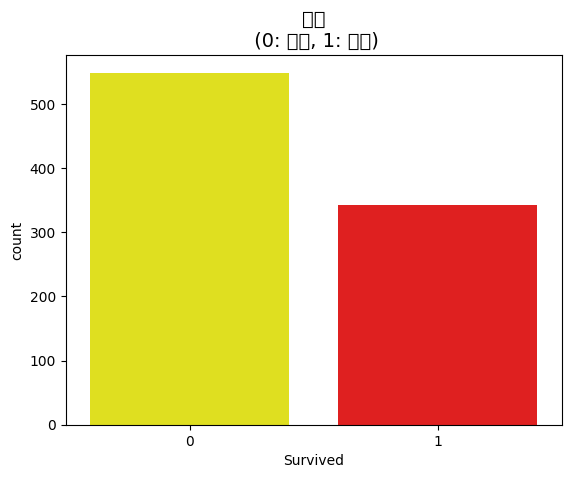

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["yellow", "red"]

sns.countplot(x='Survived', data=df, palette=colors)

plt.title('분류\n (0: 사망, 1: 생존)', fontsize=14)

#불균형 데이터셋

In [8]:
train_cols = df.columns[1:]

X = df[train_cols] # 독립변수

y = df["Survived"]

print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [9]:
#언더샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=train_cols )

y_samp = pd.DataFrame(data=y_sample,columns=['Survived'])

df2=pd.concat([X_samp,y_samp],axis=1)

In [10]:
X = X_samp[train_cols] # 독립변수

y = y_samp["Survived"]

In [11]:
import statsmodels.api as sm

model=sm.Logit(y,X)

result=model.fit()

result.summary2()

#모델의 설명력 32.2%

# Parch, Fare는 유의하지 않음

# 해석 : coef(회귀계수)를 기준으로 볼 때의 생존 확률

# 좌석등급 : 1등석 > 2등석 > 3등석 순으로 생존률이 높았다.

# 성별 : 여성은 생존 확률이 높았다.

# 1등석 > 2등석 > 성별 > 3등석순으로 생존 여부에 영향을 미쳤음

         Current function value: 0.466486
         Iterations: 35


c:\python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit              Method:             MLE       
Dependent Variable:    Survived           Pseudo R-squared:   0.327     
Date:                  2024-03-18 09:35   AIC:                656.1528  
No. Observations:      684                BIC:                696.9045  
Df Model:              8                  Log-Likelihood:     -319.08   
Df Residuals:          675                LL-Null:            -474.11   
Converged:             0.0000             LLR p-value:        2.9525e-62
No. Iterations:        35.0000            Scale:              1.0000    
------------------------------------------------------------------------
         Coef.    Std.Err.      z    P>|z|      [0.025         0.975]   
------------------------------------------------------------------------
Pclass1  1.7178 5586951.9870  0.0000 1.0000 -10950222.9600 10950226.3957
Pclass2  0.6262 5586951.9870  0.0000 1.0000 -10950224.0517 10950225.3041
Pclass3 -0.3330 5586951.9870 -0.0000 1.0000 -10950225.0109 10950224.3449
male    -0.3334 5586951.9870 -0.0000 1.0000 -10950225.0113 10950224.3444
female   2.3445 5586951.9870  0.0000 1.0000 -10950222.3334 10950227.0224
Age     -0.0355       0.0088 -4.0333 0.0001        -0.0527       -0.0182
SibSp   -0.3053       0.1234 -2.4750 0.0133        -0.5471       -0.0635
Parch    0.0078       0.1496  0.0519 0.9586        -0.2854        0.3009
Fare     0.0024       0.0028  0.8660 0.3865        -0.0030        0.0078
========================================================================

"""

In [12]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

print("학습용:",model.score(X_train, y_train))

print("검증용:",model.score(X_test, y_test))

학습용: 0.7678244972577697
검증용: 0.8029197080291971


In [13]:
#confusion matrix(혼동행렬, 오분류표) 출력

from sklearn.metrics import confusion_matrix

pred=model.predict(X_test)

cm=confusion_matrix(y_test, pred)

cm

array([[56, 13],
       [14, 54]], dtype=int64)

In [14]:
df_cm=pd.DataFrame(cm, index=['0','1'], columns=['0', '1'])

df_cm

,0,1
0,56,13
1,14,54


<Axes: title={'center': 'Confusion Matrix'}>

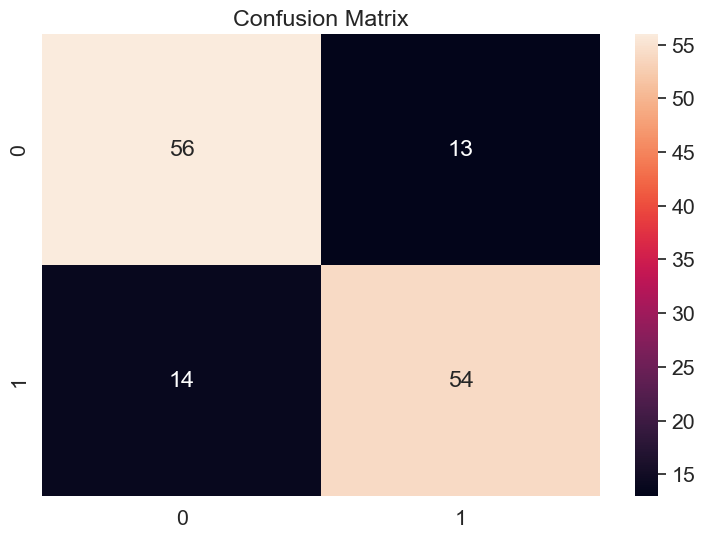

In [15]:
from matplotlib import pyplot as plt

sns.set(font_scale=1.4)

plt.figure(figsize=(9,6))

plt.title("Confusion Matrix")

sns.heatmap(df_cm, annot=True)

# 색상이 밝으면 높은 숫자, 색상이 어두우면 낮은 숫자

In [16]:
#새로운 값 예측

#1등석, 2등석, 3등석, 남성, 여성, 나이, 형제자매, 부모자녀, 요금

#3등석, 남성, 19세, 형제자매1, 부모자녀0, 요금50

person1 = [[0, 0, 1, 1, 0, 19, 1, 0, 50]]

#1등석, 여성, 17세, 형제자매0, 부모자녀2, 요금30

person2 = [[1, 0, 0, 0, 1, 17, 0, 2, 30]]

#2등석, 여성, 40세, 형제자매2, 부모자녀0, 요금20

person3 = [[0, 1, 0, 0, 1, 40, 2, 0, 70]]

print(model.predict(person1))

print(model.predict(person2))

print(model.predict(person3))

print(model.predict_proba(person1))  

print(model.predict_proba(person2))  

print(model.predict_proba(person3))

[0]
[1]
[1]
[[0.82780847 0.17219153]]
[[0.04441093 0.95558907]]
[[0.21685432 0.78314568]]


c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with

In [17]:
import joblib

joblib.dump(model, 'c:/data/titanic/titanic_logit.model')

['c:/data/titanic/titanic_logit.model']

In [18]:
import numpy as np

import joblib

model=joblib.load('c:/data/titanic/titanic_logit.model')

In [19]:
#새로운 값 예측

#1등석, 2등석, 3등석, 남성, 여성, 나이, 요금, 형제자매, 부모자녀

#3등석, 남성, 19세, 형제자매1, 부모자녀0, 요금50

person1 = np.array([0, 0, 1, 1, 0, 19,1,0, 50]).reshape(1,9)

#1등석, 여성, 17세, 형제자매0, 부모자녀2, 요금30

person2 = np.array([1, 0, 0, 0, 1, 17, 0,2,30]).reshape(1,9)

#2등석, 여성, 40세, 형제자매2, 부모자녀0, 요금20

person3 = np.array([0, 1, 0, 0, 1, 40,2, 0,70]).reshape(1,9)

print(model.predict(person1))

print(model.predict(person2))

print(model.predict(person3))

rate=model.predict_proba(person1)

print(rate[0][-1])

[0]
[1]
[1]
0.17219152909900112


c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd

from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

dfX=pd.DataFrame(X,columns=['a','b'])

dfy=pd.DataFrame(y,columns=['y'])

df=pd.concat([dfX,dfy],axis=1)

df

,a,b,y
0,0.222014,0.540207,0
1,1.347439,1.412824,0
2,0.537238,0.372730,0
3,2.134462,1.404819,0
4,2.315827,1.356858,0
...,...,...,...
9995,2.440385,1.695643,0
9996,-0.790502,0.194243,0
9997,1.878130,0.829500,0
9998,2.585933,1.927995,0


In [2]:
X1 = df[['a','b']] # 독립변수

y1 = df["y"]

df["y"].value_counts() #불균형 데이터셋

y
0    9900
1     100
Name: count, dtype: int64

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2,  stratify=y1, random_state=10)

In [4]:
#불균형 데이터셋으로 만든 모형

model1 = LogisticRegression(random_state=0)

model1.fit(X_train, y_train)

print("학습용:",model1.score(X_train, y_train))

print("검증용:",model1.score(X_test, y_test))

학습용: 0.99425
검증용: 0.995


In [5]:
from sklearn.metrics import confusion_matrix

pred1=model1.predict(X_test)

confusion_matrix(y_test, pred1)

array([[1980,    0],
       [  10,   10]], dtype=int64)

In [6]:
from sklearn.metrics import classification_report

#소수 클래스의 정확도와 precision, precision,recall,f1-score 확인

print(classification_report(y_test, pred1))

# score는 0.9945로 높으나 recall의 경우 10/(10+10) = 0.5로 낮아지는 문제가 발생함

#모형의 전반적인 정확도(accuracy)는 높지만 소수 클래스의 재현율(recall)이 0.5로 낮은 문제점

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1980
           1       1.00      0.50      0.67        20

    accuracy                           0.99      2000
   macro avg       1.00      0.75      0.83      2000
weighted avg       1.00      0.99      0.99      2000



In [7]:
#균형 데이터

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, flip_y=0, random_state=1)
dfX=pd.DataFrame(X,columns=['a','b'])

dfy=pd.DataFrame(y,columns=['y'])

df2=pd.concat([dfX,dfy],axis=1)

df2["y"].value_counts()

y
0    5000
1    5000
Name: count, dtype: int64

In [8]:
X2 = df2[['a','b']] # 독립변수

y2 = df2["y"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, stratify=y2, random_state=10)

In [10]:
model2 = LogisticRegression(random_state=42)

model2.fit(X_train, y_train)

print("학습용:",model2.score(X_train, y_train))

print("검증용:",model2.score(X_test, y_test))

학습용: 0.896125
검증용: 0.891


In [13]:
pred3=model2.predict(X_test)

print(classification_report(y_test, pred3))

#정확도와 재현율이 비슷하게 처리됨

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1000
           1       0.90      0.87      0.89      1000

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000



In [14]:
#전처리 자동화와 교차검증
import pandas as pd

from sklearn.datasets import fetch_openml

# https://www.openml.org/d/40945

X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)

df=pd.concat([X,y],axis=1)

df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,0
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,0


In [15]:
df.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'body', 'home.dest', 'survived'],
      dtype='object')

In [16]:
train_cols = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']

X = df[train_cols] # 독립변수

y = df["survived"]

y.value_counts()

survived
0    809
1    500
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_9260\2925942523.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=df, palette=colors)


<Axes: xlabel='survived', ylabel='count'>

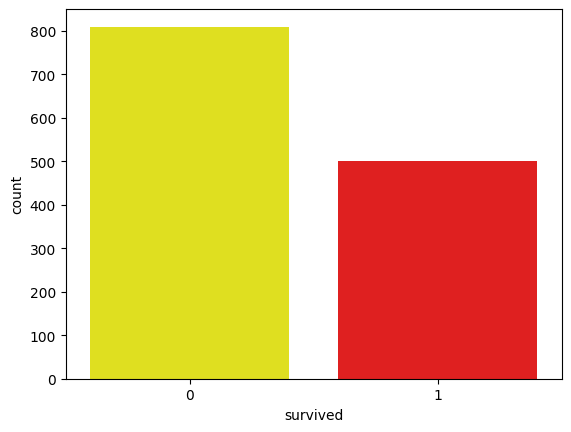

In [18]:
import seaborn as sns

import matplotlib.pyplot as plt

colors = ["yellow", "red"]

sns.countplot(x='survived', data=df, palette=colors)

In [19]:
#언더샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['survived'])

df2=pd.concat([X_samp,y_samp],axis=1)

df2.survived.value_counts()

survived
0    500
1    500
Name: count, dtype: int64

In [20]:
X = df2[train_cols] # 독립변수

y = df2["survived"]

C:\Users\user\AppData\Local\Temp\ipykernel_9260\1220510447.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=df2, palette=colors)


<Axes: xlabel='survived', ylabel='count'>

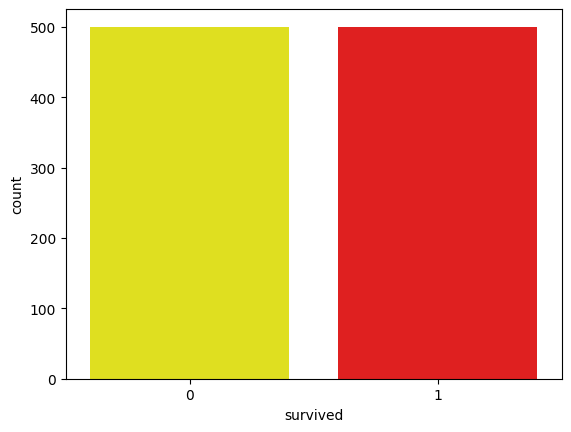

In [22]:
colors = ["yellow", "red"]

sns.countplot(x='survived', data=df2, palette=colors)

In [23]:
X = X_samp[train_cols] # 독립변수

y = y_samp["survived"]

In [24]:
#데이터 전처리 자동화
#연속된 변환을 순서대로 처리하는 클래스

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer

#결측값 처리 - 나이, 요금(중위수로 처리)
#스케일링

numeric_features = ['age', 'fare']

numeric_transformer = Pipeline(steps=[

    ('imputer', SimpleImputer(strategy='median')),
      #변수     #객체                   중위수
    ('scaler', StandardScaler())])

#범주형 변수 - 원핫인코딩
# embarked: {'C', 'S', 'Q'}
# sex: {'female', 'male'}
# pclass: {1, 2, 3}
# handle_unknown='ignore'  변환 중에 에러가 발생할 경우 무시하고 계속 진행

categorical_features = ['embarked', 'sex', 'pclass']

categorical_transformer = Pipeline(steps=[ #작업순서

    ('imputer', SimpleImputer(strategy='most_frequent')),
      
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(

    transformers=[

        ('num', numeric_transformer, numeric_features),

        ('cat', categorical_transformer, categorical_features)])

# 전처리 후 로지스틱 회귀분석 분류모형

clf = Pipeline(steps=[('preprocessor', preprocessor),

                      ('classifier', LogisticRegression())])

clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['embarked', 'sex',
                                                   'pclass'])])),
                ('classifier', LogisticRegression())])

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))

print(clf.score(X_test, y_test))

0.765
0.775


In [26]:
#교차검증과 모형의 튜닝
#하이퍼 파라미터 최적화

from sklearn.model_selection import GridSearchCV

# 숫자 결측값 처리
# Cost

param_grid = {

    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100],
}

grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search.fit(X, y)
grid_search.cv_results_["params"]


[{'classifier__C': 0.0001, 'preprocessor__num__imputer__strategy': 'mean'},
 {'classifier__C': 0.0001, 'preprocessor__num__imputer__strategy': 'median'},
 {'classifier__C': 0.001, 'preprocessor__num__imputer__strategy': 'mean'},
 {'classifier__C': 0.001, 'preprocessor__num__imputer__strategy': 'median'},
 {'classifier__C': 0.01, 'preprocessor__num__imputer__strategy': 'mean'},
 {'classifier__C': 0.01, 'preprocessor__num__imputer__strategy': 'median'},
 {'classifier__C': 0.1, 'preprocessor__num__imputer__strategy': 'mean'},
 {'classifier__C': 0.1, 'preprocessor__num__imputer__strategy': 'median'},
 {'classifier__C': 1.0, 'preprocessor__num__imputer__strategy': 'mean'},
 {'classifier__C': 1.0, 'preprocessor__num__imputer__strategy': 'median'},
 {'classifier__C': 10, 'preprocessor__num__imputer__strategy': 'mean'},
 {'classifier__C': 10, 'preprocessor__num__imputer__strategy': 'median'},
 {'classifier__C': 100, 'preprocessor__num__imputer__strategy': 'mean'},
 {'classifier__C': 100, 'prep

In [27]:
scores=grid_search.cv_results_["mean_test_score"]

scores

array([0.727, 0.727, 0.748, 0.748, 0.75 , 0.75 , 0.754, 0.75 , 0.754,
       0.753, 0.754, 0.753, 0.754, 0.753])

0.7540000000000001


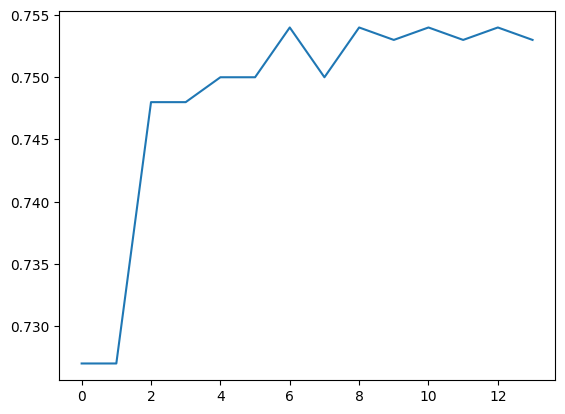

In [28]:
print(max(scores))

plt.plot(scores)

In [29]:
print(grid_search.best_score_)

print(grid_search.best_params_)

0.7540000000000001
{'classifier__C': 0.1, 'preprocessor__num__imputer__strategy': 'mean'}
